<a href="https://colab.research.google.com/github/Marcin19721205/MachineLearningBootCamp/blob/main/05_linear_regression_normal_equation01MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### scikit-learn
Strona biblioteki: [https://scikit-learn.org](https://scikit-learn.org)  

Dokumentacja/User Guide: [https://scikit-learn.org/stable/user_guide.html](https://scikit-learn.org/stable/user_guide.html)

Podstawowa biblioteka do uczenia maszynowego w języku Python.

Aby zainstalować bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install scikit-learn
```
Aby zaktualizować do najnowszej wersji bibliotekę scikit-learn, użyj polecenia poniżej:
```
!pip install --upgrade scikit-learn
```
Kurs stworzony w oparciu o wersję `0.22.1`

### Spis treści:
1. [Import bibliotek](#0)
2. [Przygotowanie danych](#1)
3. [Równanie normalne](#2)
4. [Regresja liniowa przy pomocy scikit-learn](#3)




### <a name='0'></a> Import bibliotek

In [20]:
import numpy as np

### <a name='1'></a> Przygotowanie danych

Przypisanie, X, Y, długość

In [21]:
X1 = np.array([1, 2, 3, 4, 5, 6])
Y = np.array([3000, 3250, 3500, 3750, 4000, 4250])
m = len(X1)

print(f'Lata pracy: {X1}')
print(f'Wynagrodzenie: {Y}')
print(f'Liczba próbek: {m}')

Lata pracy: [1 2 3 4 5 6]
Wynagrodzenie: [3000 3250 3500 3750 4000 4250]
Liczba próbek: 6


Wektor danych (u góry mamy wiersze, a potrzebujemy kolumny)

In [22]:
X1 = X1.reshape(m, 1)
print(X1)
print(X1.shape)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
(6, 1)


Wektor wyrazów wolnych, dajemy ten wektor zawsze, pierwsza kllumna w macierzy X, aby rozwiązać równanie normalne

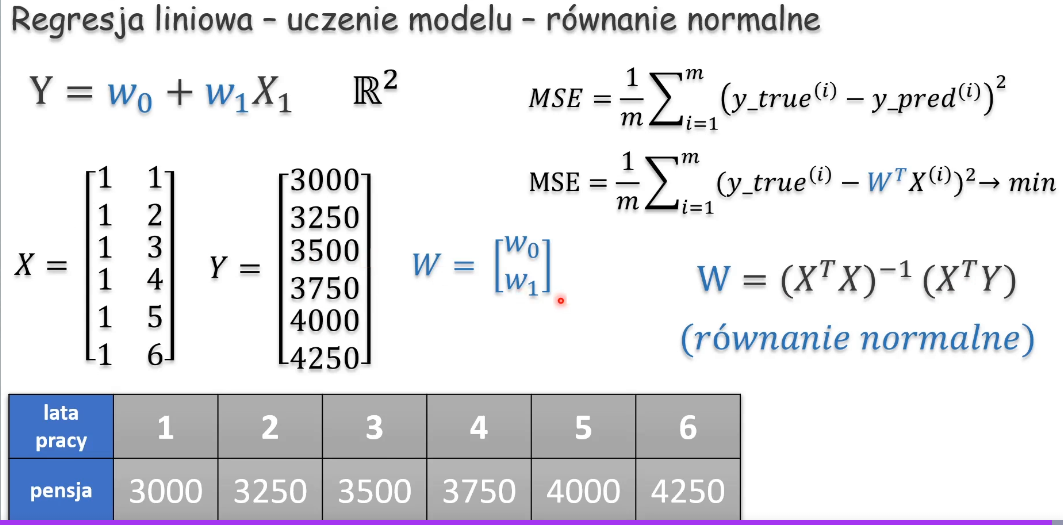

In [23]:
bias = np.ones((m, 1)) #wektor jedynek w macierzy X
print(bias)
print(bias.shape)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
(6, 1)


dodajemy bias do macierzy X

In [24]:
X = np.append(bias, X1, axis=1)
print(X)
print(X.shape)

[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]]
(6, 2)


### <a name='2'></a> Równanie normalne

Regresja liniowa w $R^2$:
$$Y = w_0 + w_1X_1$$
$$Y = W^TX$$
gdzie: $$W= \left[\begin{matrix}w_0\\w_1\end{matrix}\right]$$ $$ X= \left[\begin{matrix}1\\X_1\end{matrix}\right] $$ stąd $$ W^T= \left[\begin{matrix}w_0&w_1\end{matrix}\right] $$    
$$Y = W^TX = \left[\begin{matrix}w_0&w_1\end{matrix}\right] \cdot  \left[\begin{matrix}1\\X_1\end{matrix}\right] = w_0 + w_1X_1$$

Równanie normalne - równanie pozwalające obliczyć minimum funkcji straty (o ile istnieje)
$$W = (X^TX)^{-1}(X^TY)$$

obliczamy po kolei X transponowane * X

In [25]:
np.dot(X.T, X)

array([[ 6., 21.],
       [21., 91.]])

Odwrócenie macierzy L - lewy

In [26]:
L = np.linalg.inv(np.dot(X.T, X))
L

array([[ 0.86666667, -0.2       ],
       [-0.2       ,  0.05714286]])

drugi skłądnik X transponowane * Y - P - prawy

In [27]:
P = np.dot(X.T, Y)
P

array([21750., 80500.])

Mnożenie macierzy Lewy Prawy

In [28]:
np.dot(L, P)

array([2750.,  250.])

Końcowa postać modelu$$Y = 2750 + 250X_1$$

### <a name='3'></a> Regresja liniowa przy pomocy scikit-learn

In [29]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X1, Y)

print(regression.intercept_)
print(regression.coef_[0])

2750.0
250.0


# Regresja w R3

In [47]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

# --- Dane ---
X1 = np.array([1, 2, 5, 4, 5, 6])            # lata w obecnej firmie
X2 = np.array([0, 1, 1, 2, 3, 4])            # doświadczenie w poprzedniej
X3 = np.array([1, 1, 2, 3, 3, 4])            # poziom wykształcenia
Y  = np.array([3000, 3150, 3500, 3750, 4300, 4250])  # wynagrodzenie

# --- Macierz cech (6 próbek, 3 zmienne) ---
X = np.column_stack((X1, X2, X3))
print("Macierz X:\n", X)

# --- Model regresji ---
regression = LinearRegression()
regression.fit(X, Y)

# --- Wyniki ---
a0 = regression.intercept_
a1, a2, a3 = regression.coef_

print(f"\nModel regresji:")
print(f"Y = {a0:.2f} + {a1:.2f}·X1 + {a2:.2f}·X2 + {a3:.2f}·X3")

# --- Ocena dopasowania ---
R2 = regression.score(X, Y)
print(f"Współczynnik determinacji R² = {R2:.4f}")

# --- Tabela porównawcza ---
Y_pred = regression.predict(X)
df = pd.DataFrame({
    "X1 (lata pracy)": X1,
    "X2 (poprzednia firma)": X2,
    "X3 (wykształcenie)": X3,
    "Y (rzeczywiste)": Y,
    "Y_pred (model)": np.round(Y_pred, 2)
})
print("\n", df)


Macierz X:
 [[1 0 1]
 [2 1 1]
 [5 1 2]
 [4 2 3]
 [5 3 3]
 [6 4 4]]

Model regresji:
Y = 2818.75 + 68.75·X1 + 218.75·X2 + 75.00·X3
Współczynnik determinacji R² = 0.9311

    X1 (lata pracy)  X2 (poprzednia firma)  X3 (wykształcenie)  \
0                1                      0                   1   
1                2                      1                   1   
2                5                      1                   2   
3                4                      2                   3   
4                5                      3                   3   
5                6                      4                   4   

   Y (rzeczywiste)  Y_pred (model)  
0             3000         2962.50  
1             3150         3250.00  
2             3500         3531.25  
3             3750         3756.25  
4             4300         4043.75  
5             4250         4406.25  
